In [4]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [6]:
df=pd.DataFrame({'x1':[1,2,3,4,5,6,6,7,9,9],'x2':[5,3,6,8,1,9,5,8,9,2],'label':[1,1,0,1,0,1,0,1,0,0]})

In [7]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

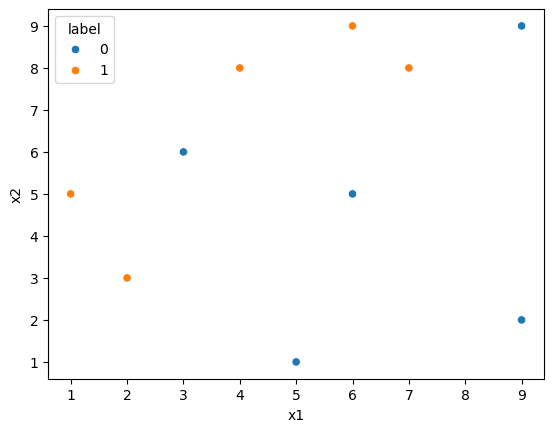

In [8]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

We assign a equal weight to each of the row

In [9]:
df['weights']=1/df.shape[0]

In [10]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt1= DecisionTreeClassifier(max_depth=1) ### max_depth should be 1 because in adaboost we uses decision stumps

In [15]:
X=df.iloc[:,0:2]
y=df.iloc[:,2:3]

In [18]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

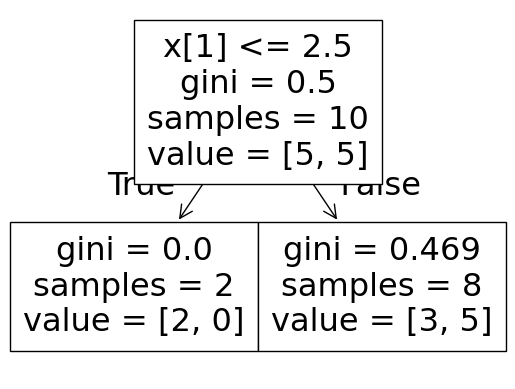

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt1)

This is our 1st model decission tree

D:\anaconda\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

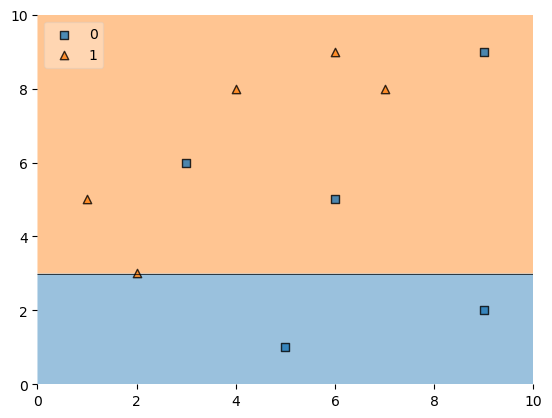

In [26]:
plot_decision_regions(np.array(X),np.array(y).reshape(-1),clf=dt1,legend=2)

In [27]:
df['y_pred']=dt1.predict(X)

In [28]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [31]:
def calculate_weight(error):
    return 0.5*np.log((1-error)/error)

error = summation of the weights of missclassified rows

In [61]:
weight1=calculate_weight(0.3)
weight1

0.42364893019360184

now update weights

In [33]:
def update_weights(row,weight=0.424):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-weight)
    else:
        return row['weights']*np.exp(weight)
df['updated_weights']=df.apply(update_weights,axis=1)

In [34]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065442
1,2,3,1,0.1,1,0.065442
2,3,6,0,0.1,1,0.152806
3,4,8,1,0.1,1,0.065442
4,5,1,0,0.1,0,0.065442
5,6,9,1,0.1,1,0.065442
6,6,5,0,0.1,1,0.152806
7,7,8,1,0.1,1,0.065442
8,9,9,0,0.1,1,0.152806
9,9,2,0,0.1,0,0.065442


In [35]:
df['normalized_wt']=df['updated_weights']/df['updated_weights'].sum()

In [36]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_wt
0,1,5,1,0.1,1,0.065442,0.071403
1,2,3,1,0.1,1,0.065442,0.071403
2,3,6,0,0.1,1,0.152806,0.166725
3,4,8,1,0.1,1,0.065442,0.071403
4,5,1,0,0.1,0,0.065442,0.071403
5,6,9,1,0.1,1,0.065442,0.071403
6,6,5,0,0.1,1,0.152806,0.166725
7,7,8,1,0.1,1,0.065442,0.071403
8,9,9,0,0.1,1,0.152806,0.166725
9,9,2,0,0.1,0,0.065442,0.071403


In [37]:
df['upper_range']=np.cumsum(df['normalized_wt'])

In [38]:
df['lower_range']=df['upper_range']-df['normalized_wt']

In [39]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_wt,upper_range,lower_range
0,1,5,1,0.1,1,0.065442,0.071403,0.071403,0.000000
1,2,3,1,0.1,1,0.065442,0.071403,0.142807,0.071403
2,3,6,0,0.1,1,0.152806,0.166725,0.309532,0.142807
3,4,8,1,0.1,1,0.065442,0.071403,0.380936,0.309532
4,5,1,0,0.1,0,0.065442,0.071403,0.452339,0.380936
5,6,9,1,0.1,1,0.065442,0.071403,0.523743,0.452339
6,6,5,0,0.1,1,0.152806,0.166725,0.690468,0.523743
7,7,8,1,0.1,1,0.065442,0.071403,0.761871,0.690468
8,9,9,0,0.1,1,0.152806,0.166725,0.928597,0.761871
9,9,2,0,0.1,0,0.065442,0.071403,1.000000,0.928597


In [40]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['upper_range'] > a and a > row['lower_range']:
        indices.append(index)
  return indices

In [41]:
index_values = create_new_dataset(df)
index_values

[6, 2, 2, 4, 0, 8, 2, 6, 6, 7]

In [42]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,x1,x2,label,weights
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1


In [67]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.625, 0.5, '  False')]

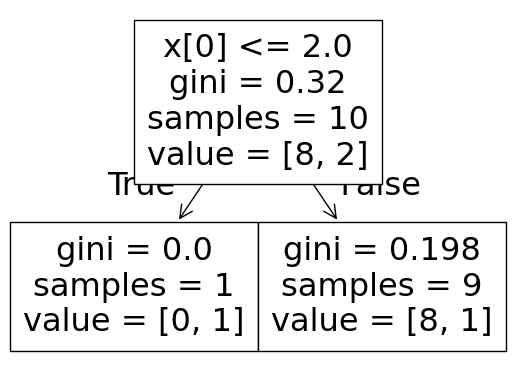

In [68]:
plot_tree(dt2)

<Axes: >

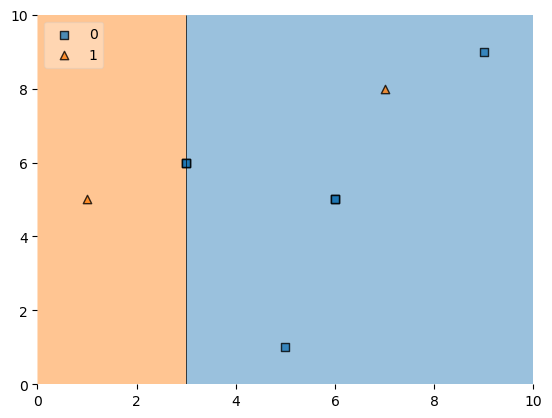

In [69]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [70]:
second_df['y_pred'] = dt2.predict(X)
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_wt,upper_range,lower_range
6,6,5,0,0.1,0,0.033622,0.056034,0.056034,0.000000
2,3,6,0,0.1,0,0.033622,0.056034,0.112068,0.056034
2,3,6,0,0.1,0,0.033622,0.056034,0.168102,0.112068
4,5,1,0,0.1,0,0.033622,0.056034,0.224136,0.168102
0,1,5,1,0.1,1,0.033622,0.056034,0.280170,0.224136
8,9,9,0,0.1,0,0.033622,0.056034,0.336204,0.280170
2,3,6,0,0.1,0,0.033622,0.056034,0.392238,0.336204
6,6,5,0,0.1,0,0.033622,0.056034,0.448272,0.392238
6,6,5,0,0.1,0,0.033622,0.056034,0.504306,0.448272
7,7,8,1,0.1,0,0.297427,0.495694,1.000000,0.504306


In [71]:
weight2 = calculate_weight(0.1)
weight2

1.0986122886681098

In [72]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_wt,upper_range,lower_range
6,6,5,0,0.1,0,0.033622,0.056034,0.056034,0.000000
2,3,6,0,0.1,0,0.033622,0.056034,0.112068,0.056034
2,3,6,0,0.1,0,0.033622,0.056034,0.168102,0.112068
4,5,1,0,0.1,0,0.033622,0.056034,0.224136,0.168102
0,1,5,1,0.1,1,0.033622,0.056034,0.280170,0.224136
8,9,9,0,0.1,0,0.033622,0.056034,0.336204,0.280170
2,3,6,0,0.1,0,0.033622,0.056034,0.392238,0.336204
6,6,5,0,0.1,0,0.033622,0.056034,0.448272,0.392238
6,6,5,0,0.1,0,0.033622,0.056034,0.504306,0.448272
7,7,8,1,0.1,0,0.297427,0.495694,1.000000,0.504306


In [73]:
second_df['normalized_wt']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [74]:
second_df['upper_range']=np.cumsum(second_df['normalized_wt'])
second_df['lower_range']=second_df['upper_range']-second_df['normalized_wt']

In [75]:
index_values = create_new_dataset(second_df)
index_values

[7, 4, 2, 7, 8, 7, 7, 7, 7, 7]

In [76]:
third_df = df.iloc[index_values,[0,1,2,3]]
third_df

,x1,x2,label,weights
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [77]:
dt3 = DecisionTreeClassifier(max_depth=1)
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.625, 0.5, '  False')]

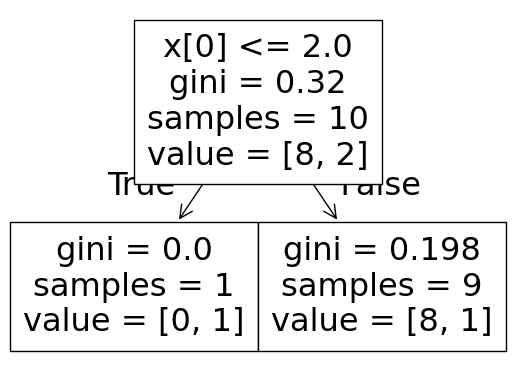

In [78]:
plot_tree(dt2)

<Axes: >

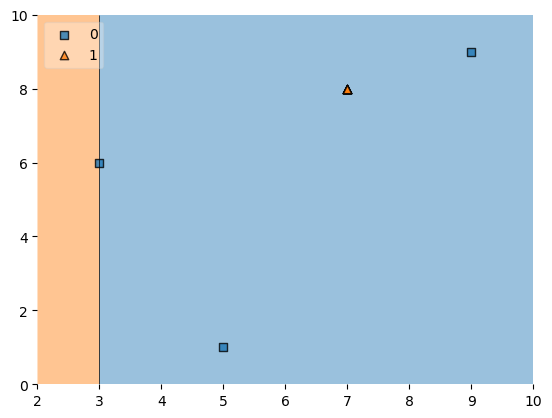

In [79]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [80]:
third_df['y_pred'] = dt2.predict(X)
third_df

,x1,x2,label,weights,y_pred
7,7,8,1,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0


In [81]:
weight3 = calculate_weight(0.7)
weight3

-0.4236489301936017

In [82]:
print(weight1,weight2,weight3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


With the help of this weights of each model we perform prediction

PREDICTION

In [83]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

D:\anaconda\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [84]:
dt2.predict(query)

array([1], dtype=int64)

In [85]:
dt3.predict(query)

array([0], dtype=int64)

In [86]:
weight1*1 + weight2*(1) + weight3*(1)

1.09861228866811

In [87]:
np.sign(1.09861228866811)

1.0

This is our final prediction on query point